In [2]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from keras.models import Sequential
from keras.optimizers import SGD
import h5py
import numpy as np
import pickle
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def read_from_file(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [4]:
def read_train(path):
    train_data = []
    labels = []
    for file in glob.glob(os.path.join(path, 'data_batch*')):
        data = read_from_file(file)
        labels.append(data[b'labels'])
        train_data.append(data[b'data'])
    
    train_data = np.concatenate(train_data)
    labels = np.concatenate(labels)
    
    return train_data, labels

In [5]:
def read_test(path):
    test_data = []
    labels = []
    for file in glob.glob(os.path.join(path, 'test_batch*')):
        data = read_from_file(file)
        labels.append(data[b'labels'])
        test_data.append(data[b'data'])
    
    test_data = np.concatenate(test_data)
    labels = np.concatenate(labels)
    
    return test_data, labels

In [6]:
x_train, y_train = read_train('Cifar10/')

In [7]:
y_labels = np.eye(10)[y_train]

In [8]:
x_train = x_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

In [9]:
x_train.shape

(50000, 32, 32, 3)

## Show the first 25 images

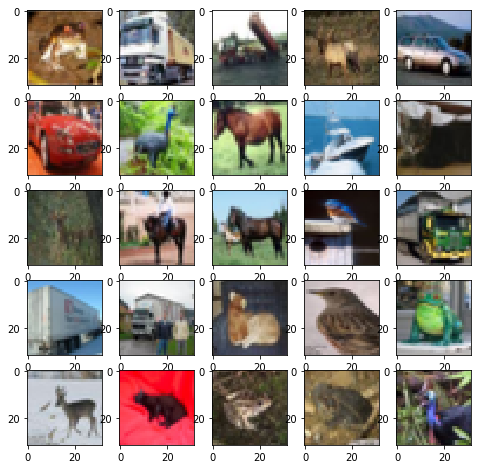

In [10]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])

In [11]:
def build_model_1():
    model= Sequential()
    model.add(Conv2D(kernel_size=5, activation='relu', filters=32, input_shape=(32, 32, 3)))
    model.add(MaxPool2D(2))
    model.add(Conv2D(kernel_size=5, activation='relu', filters=32))
    model.add(MaxPool2D(2))
    model.add(Conv2D(kernel_size=5, activation='relu', filters=64))
    model.add(Flatten()) 
    model.add(Dense(64,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model


In [12]:
model=build_model_1()
model.compile(optimizer=SGD(momentum=0.9, lr=0.001), metrics=['accuracy'], loss='categorical_crossentropy')

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 64)          51264     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
__________

In [14]:
x_train = x_train/256

In [18]:
history = model.fit(x_train, y_labels, epochs=5, batch_size=16, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 40s - loss: 1.9600 - acc: 0.2749 - val_loss: 1.6640 - val_acc: 0.3928
Epoch 2/5
35000/35000 [==============================] - 33s - loss: 1.5517 - acc: 0.4345 - val_loss: 1.4454 - val_acc: 0.4743
Epoch 3/5
35000/35000 [==============================] - 33s - loss: 1.3955 - acc: 0.4968 - val_loss: 1.3875 - val_acc: 0.5048
Epoch 4/5
35000/35000 [==============================] - 33s - loss: 1.2829 - acc: 0.5429 - val_loss: 1.2639 - val_acc: 0.5495
Epoch 5/5
35000/35000 [==============================] - 32s - loss: 1.1890 - acc: 0.5775 - val_loss: 1.2107 - val_acc: 0.5748


In [19]:
model.save('model1.h5')

In [34]:
#I had to put the full directory because it couldn't see the file
model = keras.models.load_model('/Users/carmen/Documents/ACAProj/tensorflow_benchmark/model1.h5')

In [21]:
values = model.predict(x_train)

In [22]:
values[0]

array([  1.59026997e-04,   2.62135349e-04,   2.69915387e-02,
         4.58122551e-01,   1.44834248e-02,   3.02135050e-01,
         1.82382017e-01,   1.51915438e-02,   2.00700539e-04,
         7.20172757e-05], dtype=float32)

In [23]:
value_labels = model.predict_classes(x_train)

49952/50000 [============================>.] - ETA: 0s

In [24]:
value_labels[1]

9